In [2]:
import numpy as np# Importing every library we need

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("data0.csv")

In [6]:
df.head()

,Market Place,Crop Variety,Producer Min,Producer Max,Wholesale Min,Wholesale Max,Retail Min,Retail Max,Volume,Collection Date
0,Enjbara,White Teff (Quintal),0,0.0,3200,3250,3300.0,3400,Sufficient,12/10/2019
1,Debretabor Segno Gebeya,White Teff (Quintal),0,0.0,3100,3150,3200.0,3250,Under,12/10/2019
2,Woldia Gebeya,White Teff (Quintal),2691,2760.0,0,0,2760.0,2829,Sufficient,12/10/2019
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),0,0.0,2940,3000,3100.0,3300,Sufficient,12/11/2019
4,Bahir Dar kebele 04,White Teff (Quintal),0,0.0,3300,3500,3450.0,3650,Sufficient,12/12/2019


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Market Place     1903 non-null   object 
 1   Crop Variety     1903 non-null   object 
 2   Producer Min     1903 non-null   int64  
 3   Producer Max     1903 non-null   float64
 4   Wholesale Min    1903 non-null   int64  
 5   Wholesale Max    1903 non-null   int64  
 6   Retail Min       1903 non-null   float64
 7   Retail Max       1903 non-null   int64  
 8   Volume           1903 non-null   object 
 9   Collection Date  1903 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 148.8+ KB


In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Market Place       0
Crop Variety       0
Producer Min       0
Producer Max       0
Wholesale Min      0
Wholesale Max      0
Retail Min         0
Retail Max         0
Volume             0
Collection Date    0
dtype: int64

In [10]:
data2=df.copy()

In [11]:
data2 = data2.dropna()

In [12]:
data2.isnull().sum()

Market Place       0
Crop Variety       0
Producer Min       0
Producer Max       0
Wholesale Min      0
Wholesale Max      0
Retail Min         0
Retail Max         0
Volume             0
Collection Date    0
dtype: int64

In [13]:
data2 = data2.drop(columns='Retail Min')# multiple in one (['f','h])

In [14]:
data2 = data2.drop(columns='Wholesale Max')

In [15]:
data2 = data2.drop(columns='Wholesale Min')

In [16]:
data2 = data2.drop(columns='Producer Max')

In [17]:
data2 = data2.drop(columns='Producer Min')

In [18]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date
0,Enjbara,White Teff (Quintal),3400,Sufficient,12/10/2019
1,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,12/10/2019
2,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,12/10/2019
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),3300,Sufficient,12/11/2019
4,Bahir Dar kebele 04,White Teff (Quintal),3650,Sufficient,12/12/2019


In [19]:
data2["Collection Date"][4]

'12/12/2019'

In [20]:
data2["Collection Date"].value_counts()

Collection Date
5/9/2020      5
12/20/2022    5
12/24/2020    5
1/10/2023     5
7/18/2020     5
             ..
7/26/2021     1
7/19/2021     1
7/12/2021     1
12/11/2019    1
1/19/2023     1
Name: count, Length: 791, dtype: int64

In [21]:
str = data2["Collection Date"][1]#taking any arbitrary data spliting it by calling split methode
str2 = str.split()#spliting it to 5,/,1,/,2019   thus str[6] out of range 
print(str)
print(str2)
print(str[0])

12/10/2019
['12/10/2019']
1


In [22]:
#creating dictionary to store the months in
Dict = {1 :"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
print(Dict)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [23]:
Dict[3]

'March'

In [24]:
month = []#creating empty column

In [25]:
for rr in data2["Collection Date"]:
    str = rr
    str2 = str.split('/')
    month.append(Dict[int(str2[0])])#taking the first term, (month) from the splited

In [26]:
len(month)

1903

In [27]:
data2["month"] = month

In [28]:
data2["month"]

0       December
1       December
2       December
3       December
4       December
          ...   
1898     January
1899     January
1900     January
1901     January
1902     January
Name: month, Length: 1903, dtype: object

In [29]:
data2["month"].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [30]:
season =[]#creating empty column of season

In [31]:
for tt in data2["month"]:
    if tt== "December" or tt=="January" or tt=="February":
        season.append("Winter")
    elif tt=="March" or tt=="April" or tt== "May":
            season.append("Autumn")
    elif tt=="June" or tt=="July" or tt == "August":
            season.append("Summer")
    elif tt=="September" or tt=="October" or tt== "November":
            season.append("Spring")

In [32]:
len(season)

1903

In [33]:
data2["season"] = season

In [34]:
data2["season"]

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
1898    Winter
1899    Winter
1900    Winter
1901    Winter
1902    Winter
Name: season, Length: 1903, dtype: object

In [35]:
import pandas as pd 
df = pd.Timestamp("5/3/2023")
print(df.dayofweek)# will give each day like 0 = monday, 1=tuesday....

2


In [36]:
day_of_week = []

In [37]:
for rr in data2["Collection Date"]:#finding out value of each date and craating day column
    str = rr
    df = pd.Timestamp(rr)
    day = df.dayofweek
    day_of_week.append(day)

In [38]:
len(day_of_week)

1903

In [39]:
data2["day"]=day_of_week # putting the created day column to the data

In [40]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date,month,season,day
0,Enjbara,White Teff (Quintal),3400,Sufficient,12/10/2019,December,Winter,1
1,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,12/10/2019,December,Winter,1
2,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,12/10/2019,December,Winter,1
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),3300,Sufficient,12/11/2019,December,Winter,2
4,Bahir Dar kebele 04,White Teff (Quintal),3650,Sufficient,12/12/2019,December,Winter,3


In [41]:
data1 = data2.copy()

In [42]:
data2 = data2.drop(columns='Collection Date') #delating the column collection date not necessary any more

In [43]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day
0,Enjbara,White Teff (Quintal),3400,Sufficient,December,Winter,1
1,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,December,Winter,1
2,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,December,Winter,1
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),3300,Sufficient,December,Winter,2
4,Bahir Dar kebele 04,White Teff (Quintal),3650,Sufficient,December,Winter,3


<Axes: >

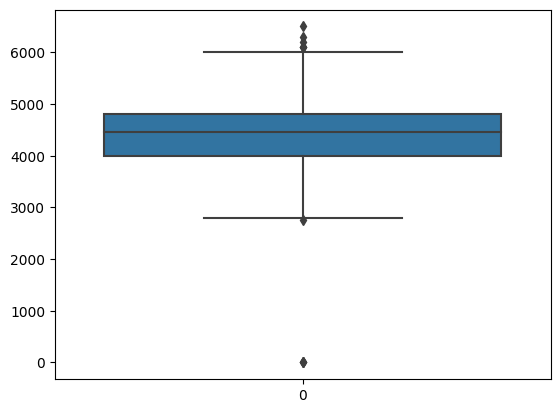

In [44]:
import seaborn as sns
sns.boxplot(data2['Retail Max'])# look if there are out layers and remove them

# Removing out layers of Retail Max price 25%<values<75% out of this range

In [45]:
#IQR
Q1=np.percentile(data2['Retail Max'], 25,interpolation="midpoint")
Q3=np.percentile(data2['Retail Max'], 75,interpolation="midpoint")
IQR=Q3-Q1

C:\Users\user\AppData\Local\Temp\ipykernel_16948\2964940248.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data2['Retail Max'], 25,interpolation="midpoint")
C:\Users\user\AppData\Local\Temp\ipykernel_16948\2964940248.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(data2['Retail Max'], 75,interpolation="midpoint")


In [46]:
#Upper bound
upper=np.where(data2['Retail Max']>=(Q3+1.5*IQR))
#Lower bound
lower=np.where(data2['Retail Max']<=(Q1-1.5*IQR))


In [47]:
print(upper[0],lower[0])

[1846 1860 1862 1874 1887 1895] [  14  538  773 1855]


In [48]:
#...Removing the outliers...
data2.drop(upper[0], inplace=True)
data2.drop(lower[0], inplace=True)

print("New Shape: ", data2.shape)

New Shape:  (1893, 7)


<Axes: >

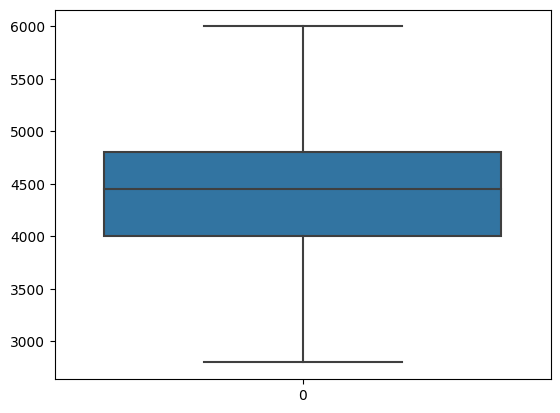

In [49]:
sns.boxplot(data2['Retail Max'])

# Graphical Analysis

<IPython.core.display.Javascript object>

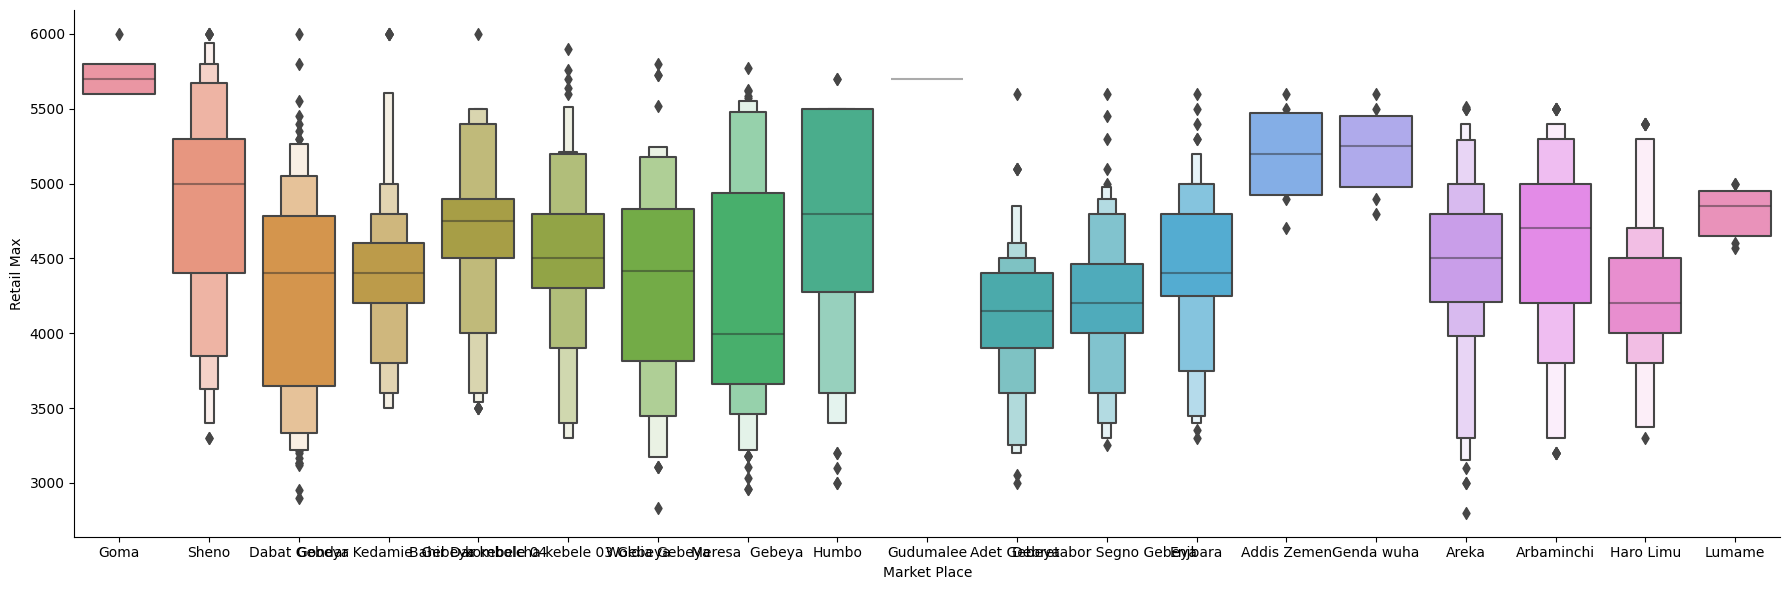

In [50]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Market Place", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

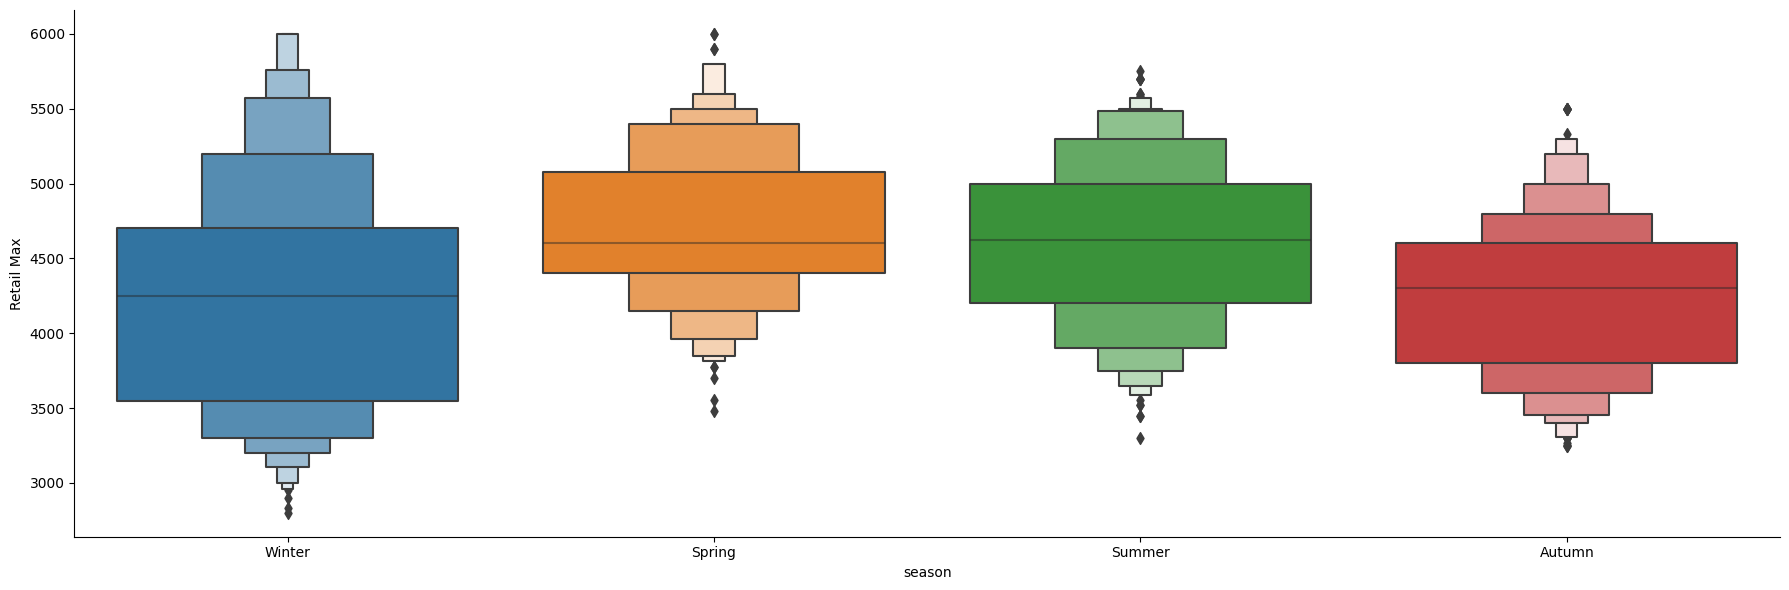

In [51]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "season", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

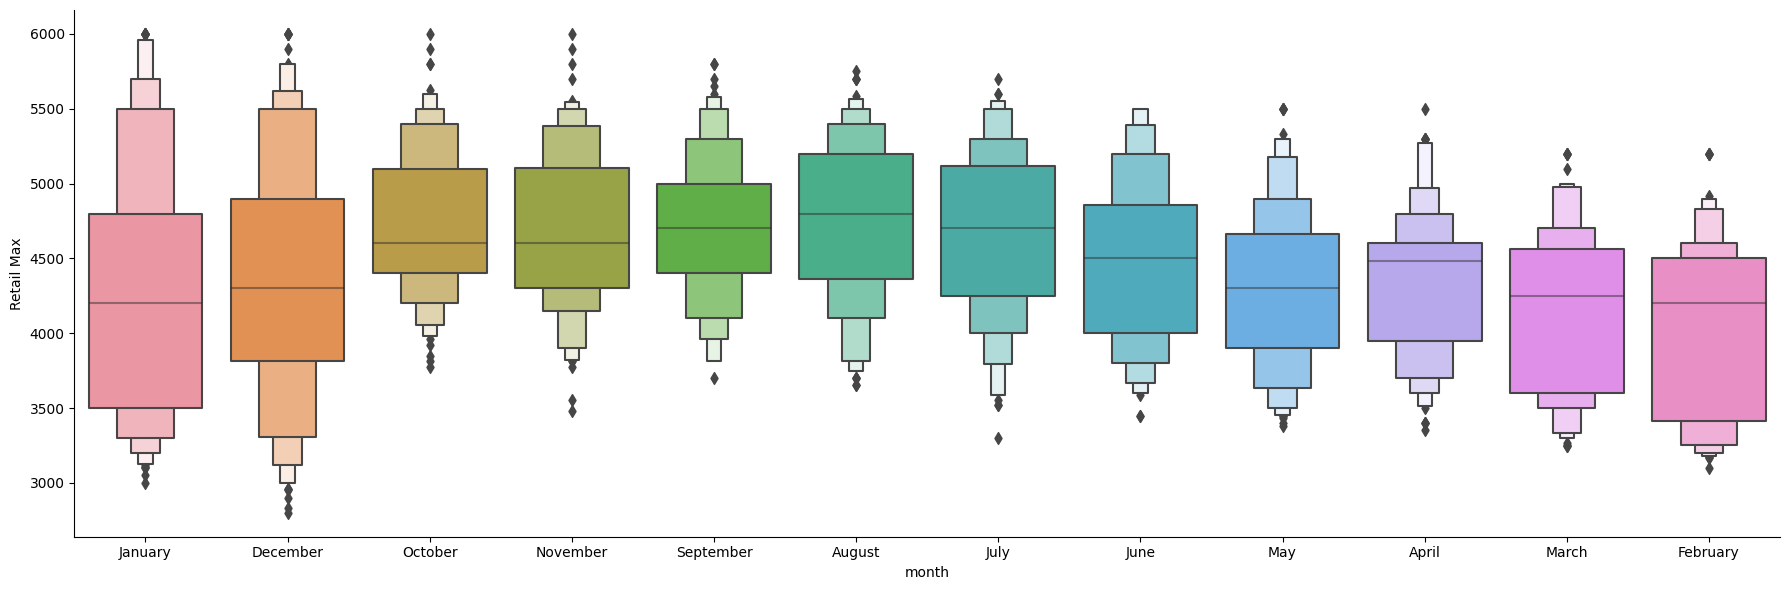

In [52]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "month", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

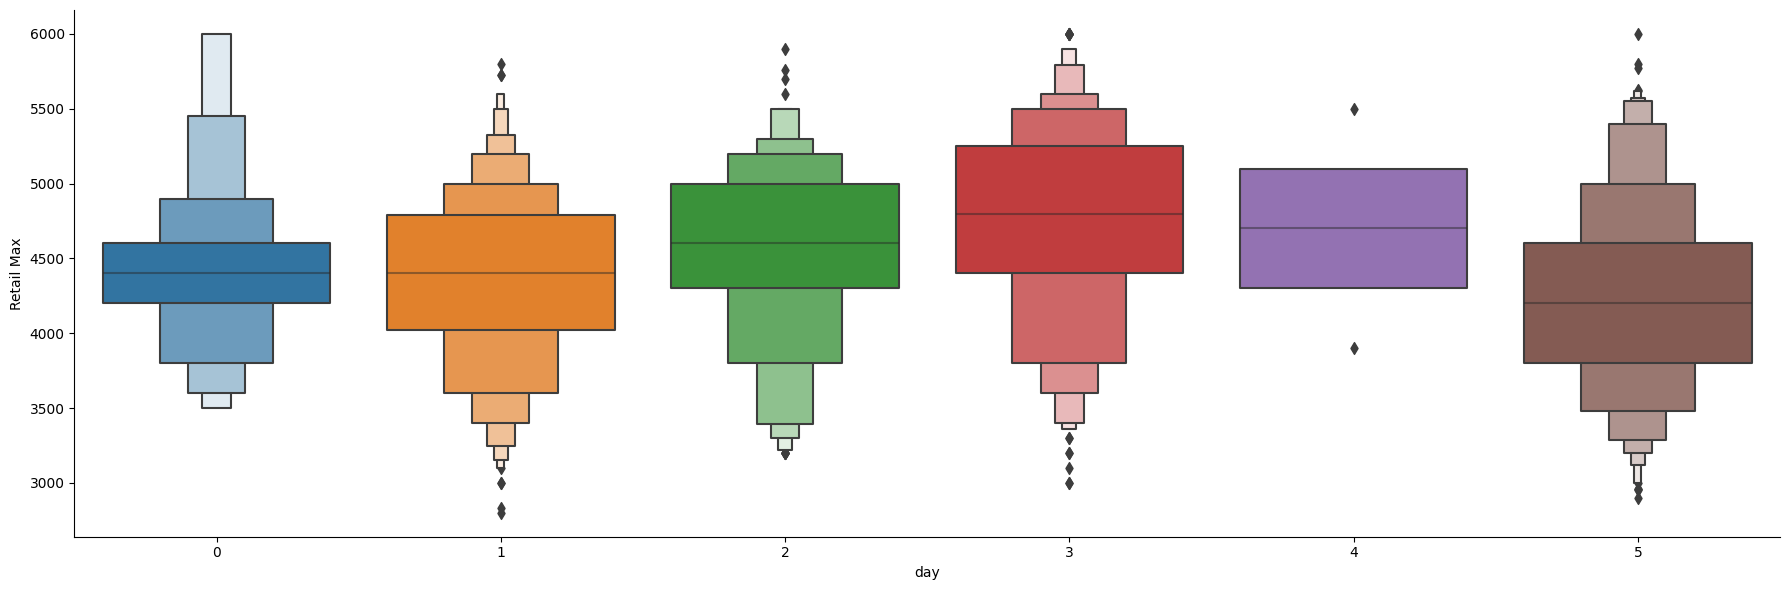

In [53]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "day", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

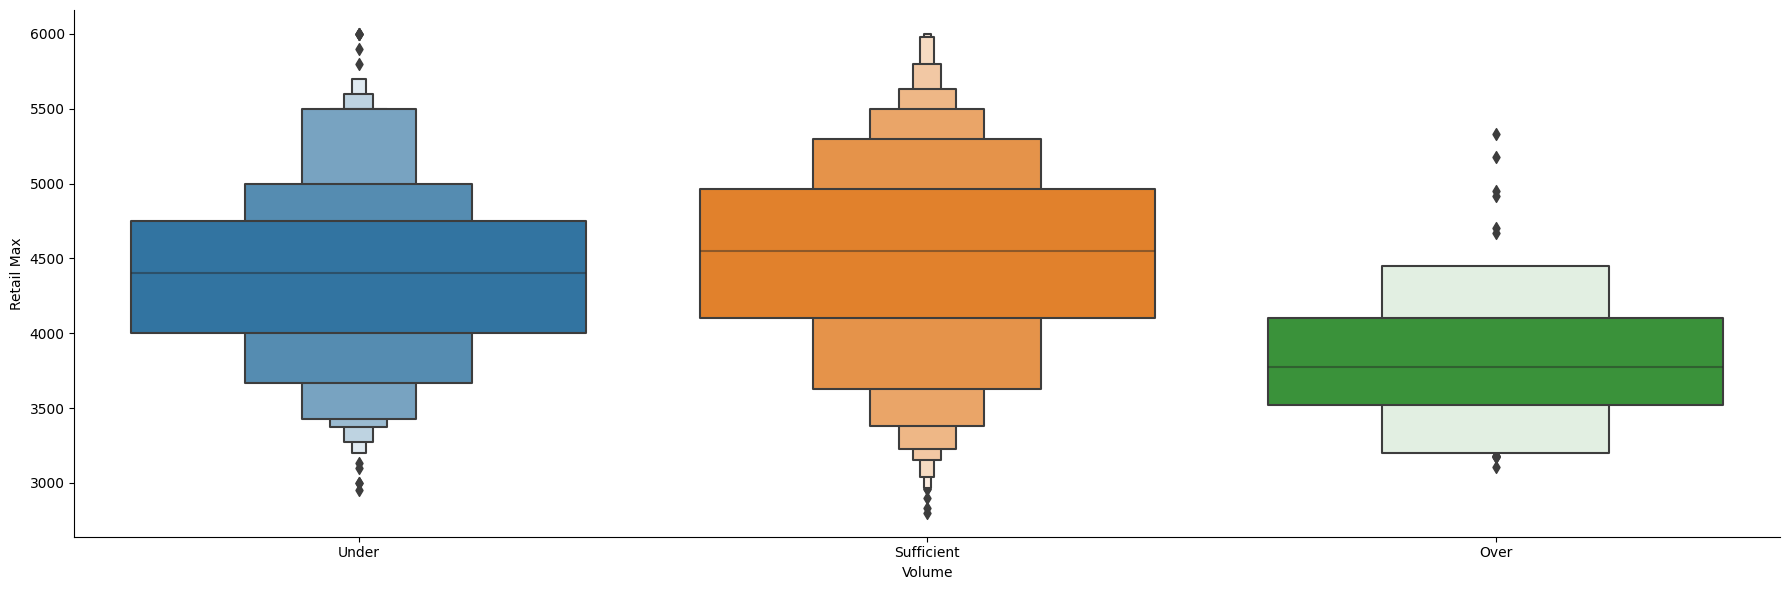

In [54]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Volume", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [55]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day
0,Enjbara,White Teff (Quintal),3400,Sufficient,December,Winter,1
1,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,December,Winter,1
2,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,December,Winter,1
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),3300,Sufficient,December,Winter,2
4,Bahir Dar kebele 04,White Teff (Quintal),3650,Sufficient,December,Winter,3


In [56]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1893 entries, 0 to 1902
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Market Place  1893 non-null   object
 1   Crop Variety  1893 non-null   object
 2   Retail Max    1893 non-null   int64 
 3   Volume        1893 non-null   object
 4   month         1893 non-null   object
 5   season        1893 non-null   object
 6   day           1893 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 182.9+ KB


# Changing the object data types in to numeric values using oneHotEncoding technique

In [57]:
# As market place is Nominal Categorical data we will perform OneHotEncoding

Market_Place = data2[["Market Place"]]

Market_Place = pd.get_dummies(Market_Place, drop_first= True)

Market_Place.head()

,Market Place_Adet Gebeya,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Genda wuha,Market Place_Goma,Market Place_Gondar Kedamie Gebeya,Market Place_Gudumalee,Market Place_Haro Limu,Market Place_Humbo,Market Place_Lumame,Market Place_Meresa Gebeya,Market Place_Sheno,Market Place_Woldia Gebeya,Market Place_kombolcha kebele 03 Gebeya
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
# As crop variety is Nominal Categorical data we will perform OneHotEncoding

Crop_Variety = data2[["Crop Variety"]]

Crop_Variety = pd.get_dummies(Crop_Variety, drop_first= True)

Crop_Variety.head()

""
0
1
2
3
4


In [59]:
# As volume is Nominal Categorical data we will perform OneHotEncoding

Volume = data2[["Volume"]]

Volume = pd.get_dummies(Volume, drop_first= True)

Volume.head()

,Volume_Sufficient,Volume_Under
0,True,False
1,False,True
2,True,False
3,True,False
4,True,False


In [60]:
# As season is Nominal Categorical data we will perform OneHotEncoding

season = data2[["season"]]

season = pd.get_dummies(season, drop_first= True)

season.head(10)# the rest for the upsent == autumn

,season_Spring,season_Summer,season_Winter
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,False,True


In [61]:
# As month is Nominal Categorical data we will perform OneHotEncoding

month = data2[["month"]]

month = pd.get_dummies(month, drop_first= True)

month.head()# 

,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,False,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False


In [62]:
data0 = data2.copy()

#concatenation of the columns to the data

In [63]:
data = pd.concat([data2, Market_Place, Crop_Variety, Volume, season, month ], axis = 1)

In [64]:
data.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day,Market Place_Adet Gebeya,Market Place_Arbaminchi,Market Place_Areka,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,Enjbara,White Teff (Quintal),3400,Sufficient,December,Winter,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,December,Winter,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,December,Winter,1,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),3300,Sufficient,December,Winter,2,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,Bahir Dar kebele 04,White Teff (Quintal),3650,Sufficient,December,Winter,3,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [65]:
datas = data.copy()

# delating the oneHotEncoded columns

In [66]:
data.drop(["Market Place", "Crop Variety", "Volume", "season", "month"], axis = 1, inplace = True)

In [67]:
data.head()

,Retail Max,day,Market Place_Adet Gebeya,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Genda wuha,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,3400,1,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,3250,1,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2829,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,3300,2,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,3650,3,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


# splitting the data in  to train and test data 

In [68]:
data.columns

Index(['Retail Max', 'day', 'Market Place_Adet Gebeya ',
       'Market Place_Arbaminchi', 'Market Place_Areka',
       'Market Place_Bahir Dar kebele 04', 'Market Place_Dabat Gebeya',
       'Market Place_Debretabor Segno Gebeya ', 'Market Place_Enjbara',
       'Market Place_Genda wuha', 'Market Place_Goma',
       'Market Place_Gondar Kedamie  Gebeya ', 'Market Place_Gudumalee',
       'Market Place_Haro Limu', 'Market Place_Humbo', 'Market Place_Lumame',
       'Market Place_Meresa  Gebeya', 'Market Place_Sheno',
       'Market Place_Woldia Gebeya', 'Market Place_kombolcha kebele 03 Gebeya',
       'Volume_Sufficient', 'Volume_Under', 'season_Spring', 'season_Summer',
       'season_Winter', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September'],
      dtype='object')

In [71]:
features = data.loc[:,['day', 'Market Place_Adet Gebeya ',
       'Market Place_Arbaminchi', 'Market Place_Areka',
       'Market Place_Bahir Dar kebele 04', 'Market Place_Dabat Gebeya',
       'Market Place_Debretabor Segno Gebeya ', 'Market Place_Enjbara',
       'Market Place_Genda wuha', 'Market Place_Goma',
       'Market Place_Gondar Kedamie  Gebeya ', 'Market Place_Gudumalee',
       'Market Place_Haro Limu', 'Market Place_Humbo', 'Market Place_Lumame',
       'Market Place_Meresa  Gebeya', 'Market Place_Sheno',
       'Market Place_Woldia Gebeya', 'Market Place_kombolcha kebele 03 Gebeya',
       'Volume_Sufficient', 'Volume_Under', 'season_Spring', 'season_Summer',
       'season_Winter', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September']]

In [72]:
features.head()

,day,Market Place_Adet Gebeya,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Genda wuha,Market Place_Goma,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,1,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,1,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,2,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,3,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [73]:
labels = data.loc[:,'Retail Max']

In [74]:
labels.head()

0    3400
1    3250
2    2829
3    3300
4    3650
Name: Retail Max, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

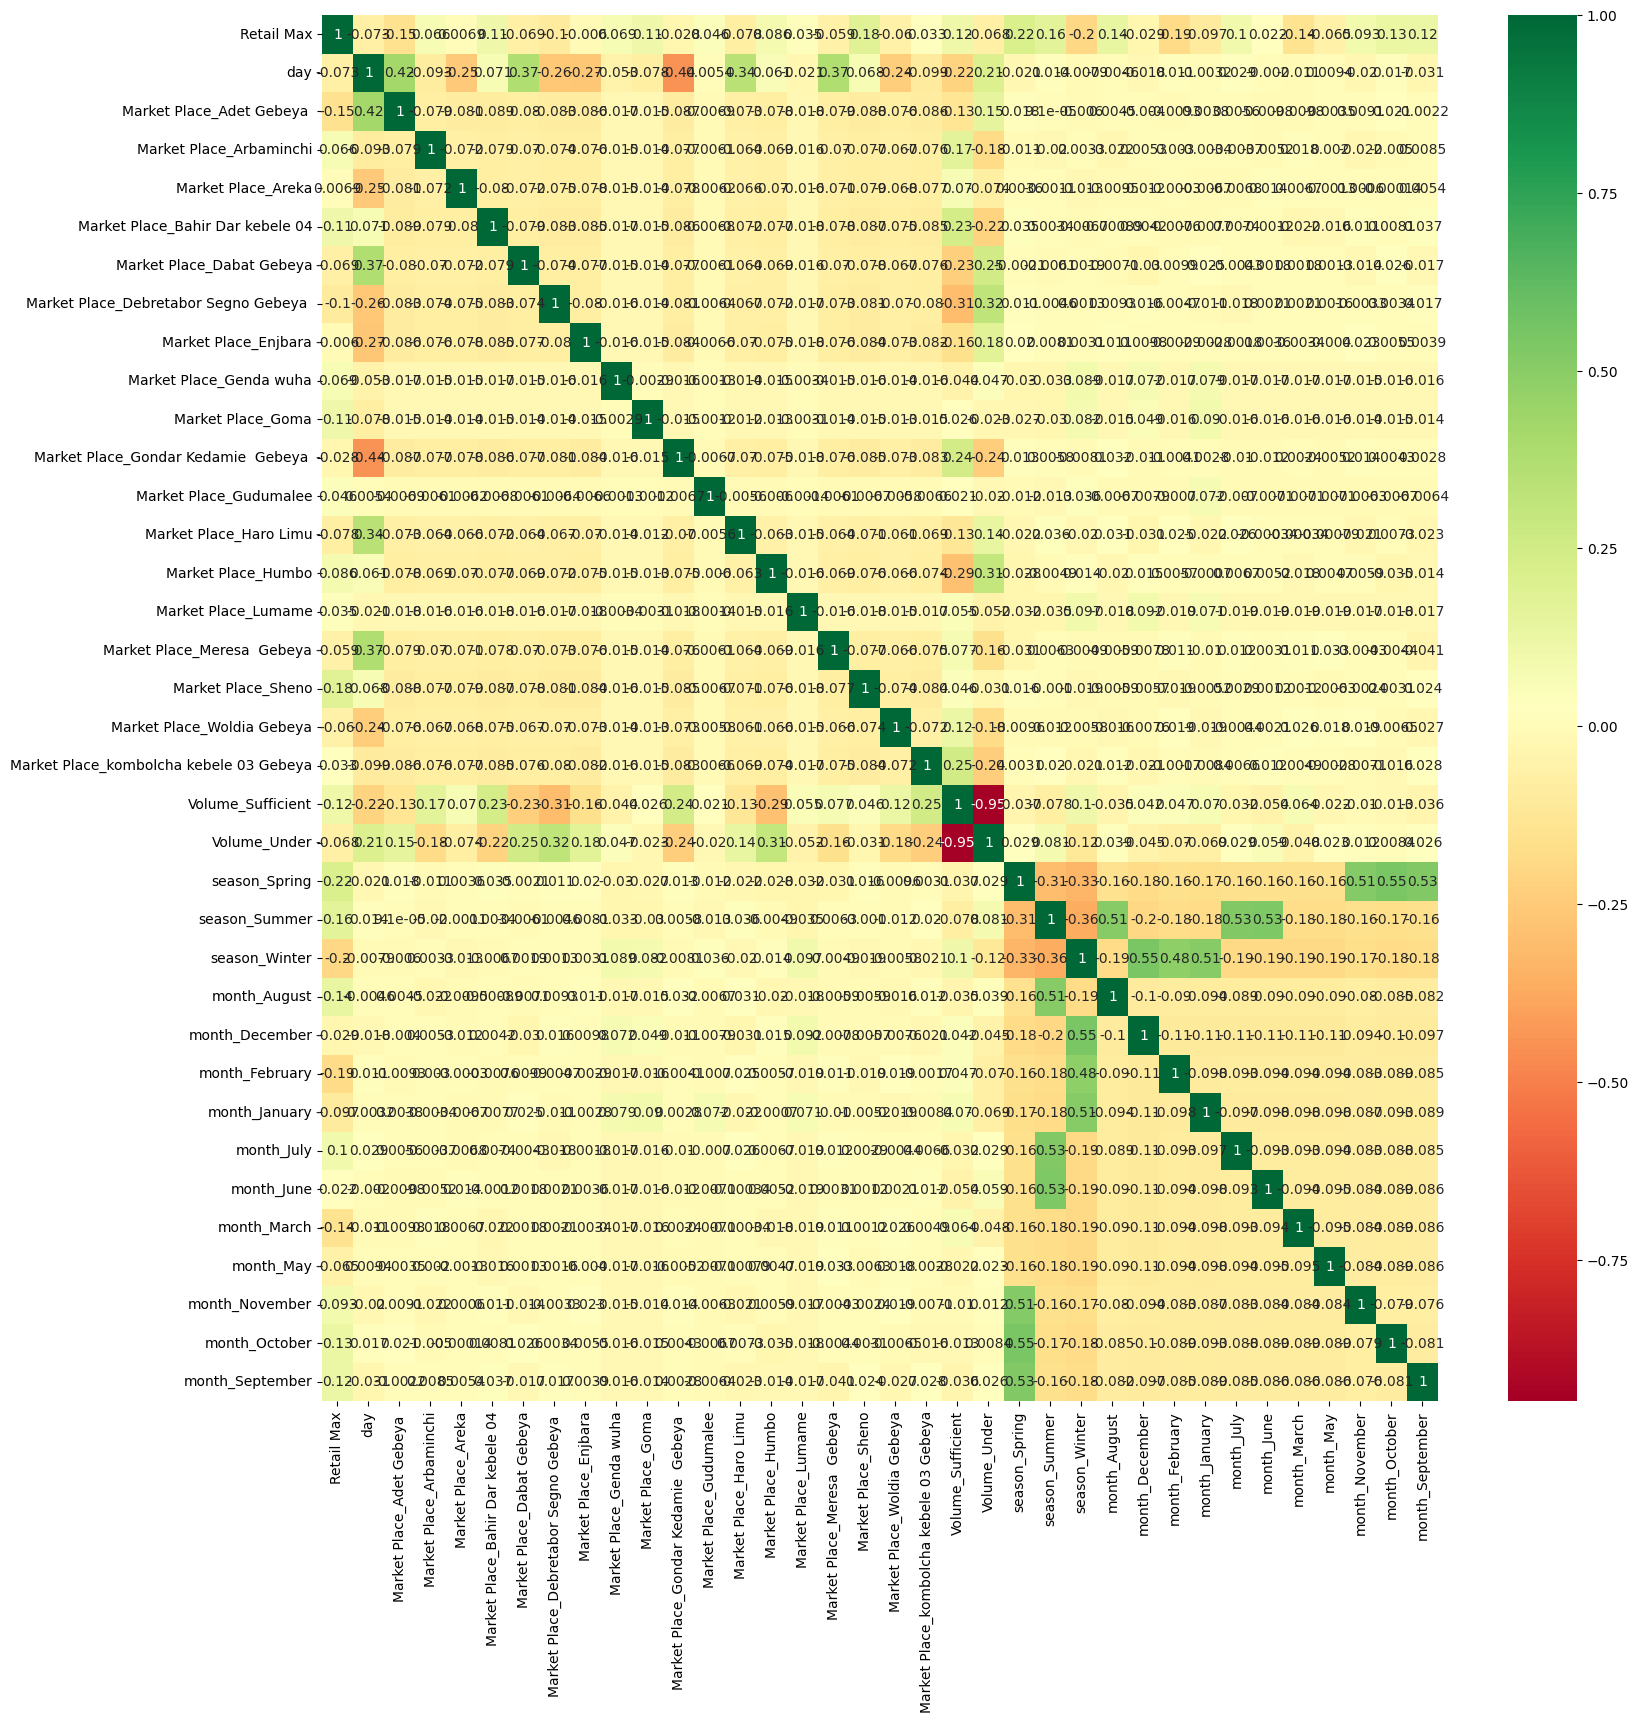

In [75]:
#
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [76]:
!pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size=0.2, random_state=2)

In [79]:
len(Xtrain)# 80 percent of 934 data == 747 and 20 percent 187

1514

In [80]:
len(Ytrain)

1514

In [81]:
len(Xtest)

379

In [82]:
len(Ytest)

379

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
model = LinearRegression()

In [85]:
model.fit(Xtrain, Ytrain)

LinearRegression()

In [86]:
ypred = model.predict(Xtest)
ypred

array([4625.2827781 , 4280.15214404, 3806.56365185, 4537.22929528,
       4503.56014621, 4914.34794986, 4439.52023467, 4778.38372472,
       4276.80821321, 4864.24400185, 4056.82128695, 4062.40627066,
       4529.42285761, 4347.38894381, 4089.21830904, 5180.40504303,
       4385.49704779, 4952.30649952, 3932.38994634, 4316.80210295,
       4166.08970872, 4786.50041254, 4190.94793608, 4173.59909674,
       4904.56461106, 4864.24400185, 4357.21200246, 5852.08463619,
       3920.64211026, 4667.61918187, 4062.84405096, 4449.41303982,
       4246.48299497, 3955.7678841 , 5180.40504303, 4008.70734329,
       4466.95161239, 4085.8337346 , 4380.49165128, 3506.57044866,
       4538.62874811, 3888.55073956, 4316.80210295, 4886.91657214,
       4959.60615519, 4529.42285761, 4280.67777037, 4370.58039332,
       4508.77631389, 4403.16422157, 4085.8337346 , 4730.09042709,
       4025.16888177, 4280.67777037, 4449.41303982, 4667.61918187,
       4331.449911  , 4757.46246375, 4418.43153066, 4156.43545

In [87]:
Ytest

370     4210
845     4250
337     3657
822     4600
1859    5500
        ... 
41      3450
1811    4800
1804    5500
1697    5500
1382    4300
Name: Retail Max, Length: 379, dtype: int64

In [88]:
model.score(Xtrain,Ytrain)

0.28468137885454703

In [89]:
model.score(Xtest,Ytest)

0.27876669215861427

C:\Users\user\AppData\Local\Temp\ipykernel_16948\2343581898.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ytest-ypred)


<IPython.core.display.Javascript object>

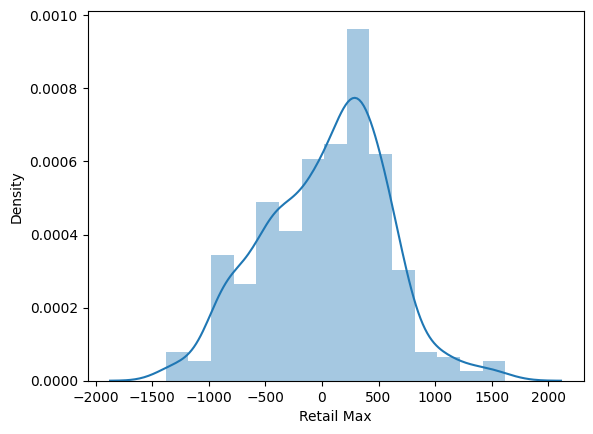

In [90]:
sns.distplot(Ytest-ypred)
plt.show()

In [91]:
metrics.r2_score(Ytest,ypred)

<IPython.core.display.Javascript object>

0.27876669215861427